In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pybert as pb

In [2]:
# %% load data(sheme) container
data = pb.DataContainerERT('synth.shm')
print(data)

Data: Electrodes: 40 data: 728


07/06/23 - 08:10:49 - pyGIMLi - WARNING - Deprecated code usage at:
07/06/23 - 08:10:49 - pyGIMLi - WARNING - None.<module>(C:\Users\Guenther.T\AppData\Local\Temp\ipykernel_20232\3046675505.py:9)
use createParaMeshPLC 


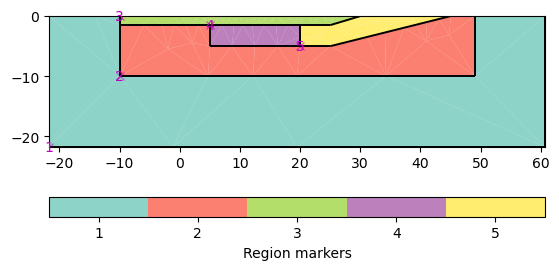

In [3]:
# %% create geometry (poly object)
dTop = -1.5
dSlag = -5.0
xLeft = -10
xRight = 30
xMid = 20
xSlag1 = 5
xSlag2 = 25
geo = mt.createParaDomain2D(data, paraDX=0.5, paraDepth=10,
                           paraBoundary=10, boundary=.3)  # first b=.3,later 3
topsoil = mt.createPolygon([[xLeft, 0], [xLeft, dTop],
                            [xSlag2, dTop], [xRight, 0]],
                           isClosed=True, marker=3)
slag1 = mt.createPolygon([[xSlag1, dTop], [xSlag1, dSlag], [xMid, dSlag],
                          [xMid, dTop]], isClosed=True, marker=4)
slag2 = mt.createPolygon([[xMid, dSlag], [xSlag2, dSlag], [45, 0], [xRight, 0],
                          [xSlag2, dTop], [xMid, dTop]], isClosed=True, marker=5)
plc = geo + topsoil + slag1 + slag2
pg.show(plc);

In [4]:
# We save the anomalies for later plotting lines on results
ano = topsoil + slag1 + slag2
ano.exportPLC("geo.poly")

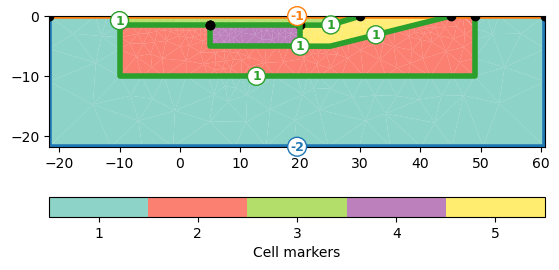

In [5]:
# %% mesh the geometry
mesh = mt.createMesh(plc)
pg.show(mesh, markers=True);

In [6]:
# the synthetic model
frvec = [0.156, 0.312, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 125,
         250, 500, 1000]  # SIP256C frequencies
fdip = pb.FDIP(f=frvec, data=data)
rho = np.array([100, 500, 500, 100, 200, 200])
m = np.array([0, 0, 0, 0, 0.8, 0.7])
tau = np.array([0, 0.001, 0.001, 0.001, 0.03, 0.3])
c = np.array([0, 0.25, 0.25, 0.25, 0.5, 0.5])

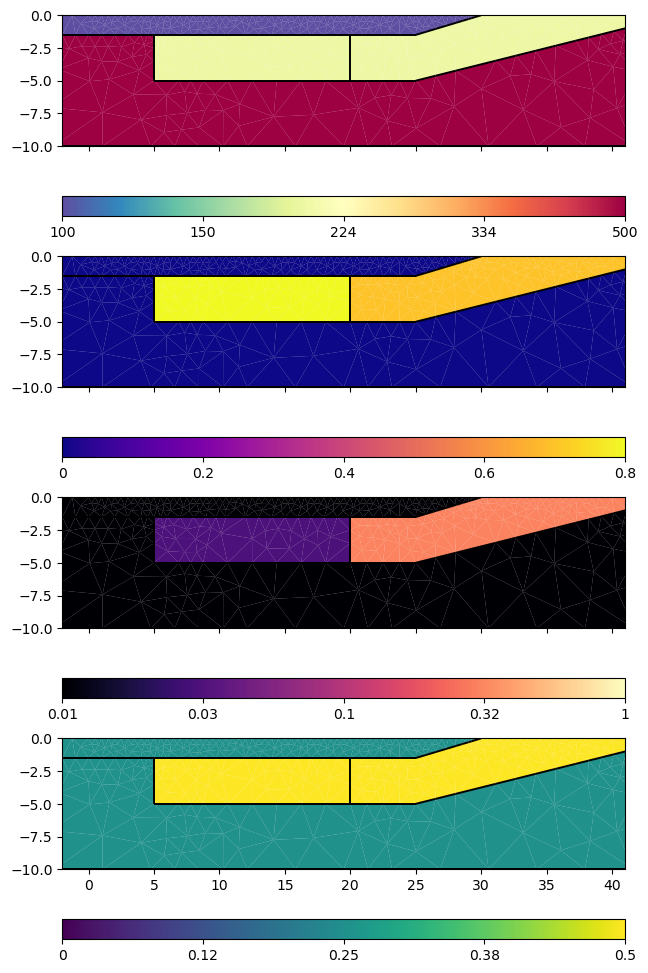

In [7]:
# %%
fig, ax = pg.plt.subplots(nrows=4, figsize=(8, 12), sharex=True, sharey=True)
cm = mesh.cellMarkers()
pg.show(mesh, rho[cm], ax=ax[0], cMin=100, cMax=500, logScale=True,
        cMap="Spectral_r")
pg.show(mesh, m[cm], ax=ax[1], cMin=0, cMax=0.8, logScale=0, cMap="plasma")
pg.show(mesh, tau[cm], ax=ax[2], cMin=0.01, cMax=1, logScale=1, cMap="magma")
pg.show(mesh, c[cm], ax=ax[3], cMin=0, cMax=0.5, logScale=0, cMap="viridis")
ax[0].set_xlim(-2, 41)
ax[0].set_ylim(-10, 0);

In [8]:
# now the actual simulation
fdip.simulate(mesh, rho, m, tau, c);

07/06/23 - 08:10:50 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:50 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:50 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:50 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:51 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:51 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:51 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:51 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:51 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:51 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:51 - pyGIMLi - WARNING - Obsolete, do not use!. Use ert.simulate instead
07/06/23 - 08:10:51 - pyGIMLi - INFO - Complex resistivity values found.
07/06/23 - 08:10:51 - 

In [9]:
fdip.basename = "synthSlag"
fdip.saveData()

In [10]:
fdip.generateDataPDF()
fdip.generateSpectraPDF()

C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  fig.clf()


<Figure size 800x1000 with 0 Axes>

<Figure size 850x1100 with 0 Axes>